# TensorFlow Regression Example

## Creating data

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
x_data = np.linspace(0.0,10.0,1000000)

In [0]:
noise = np.random.randn(len(x_data))

In [0]:
noise

array([ 0.10324281,  2.10989372,  1.29609943, ...,  0.78500718,
       -0.42667315, -0.2931382 ])

In [0]:
# y = mx + b + noise_levels
b = 5

y_true  = (0.5 * x_data) + 5 + noise

In [0]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [0]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [0]:
y_df.head()

,Y
0,5.103243
1,7.109899
2,6.296109
3,4.675828
4,5.578821


In [0]:
my_data = pd.concat([x_df,y_df],axis=1)

In [0]:
my_data.head()

,X Data,Y
0,0.00000,5.103243
1,0.00001,7.109899
2,0.00002,6.296109
3,0.00003,4.675828
4,0.00004,5.578821


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


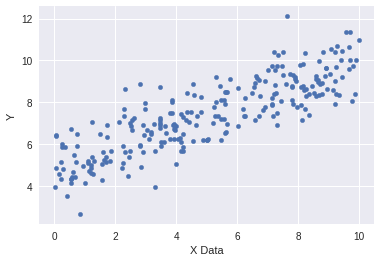

In [0]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

### One line concat dataframe

In [0]:
# my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

# TensorFlow
## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)# TensorFlow

In [0]:
batch_size = 8

In [0]:
np.random.randn(2)

array([-0.29993001,  2.62290777])

### Variables

In [0]:
m = tf.Variable(0.29)
b = tf.Variable(2.62)

### Placeholders

In [0]:
xph = tf.placeholder(tf.float32, [batch_size])

In [0]:
yph = tf.placeholder(tf.float32, [batch_size])

### Graph

In [0]:
y_model = m*xph + b

### Loss Function

In [0]:
error = tf.reduce_sum(tf.square(yph-y_model))

### Optimizer

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

### Initialize Variables

In [0]:
init = tf.global_variables_initializer()

### Session

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  batches = 1000
  
  for i in range(batches):
    rand_ind = np.random.randint(len(x_data),size=batch_size)
    
    feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
    
    sess.run(train,feed_dict = feed)
  
  model_m, model_b = sess.run([m,b])

In [0]:
model_m

0.5028174

In [0]:
model_b

4.9598346

### Result

In [0]:
y_hat = x_data*model_m + model_b

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


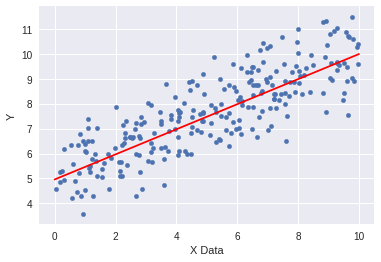

In [0]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data,y_hat,'r')

# TF Estimator## tf.estimator API

Much simpler API for basic tasks like regression! We'll talk about more abstractions like TF-Slim later on.

In [0]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [0]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp_qaeg6ei', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f872cabb438>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train Test Split

We haven't actually performed a train test split yet! So let's do that on our data now and perform a more realistic version of a Regression Task

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true, test_size=0.3,random_state=101)

### Set up Estimator Inputs

In [0]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8, num_epochs=None, shuffle=True)

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8, num_epochs=1000, shuffle=False)

In [0]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8, num_epochs=1000, shuffle=False)

### Train the Estimator

In [0]:
estimator.train(input_fn=input_func, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp_qaeg6ei/model.ckpt.
INFO:tensorflow:loss = 422.28754, step = 0
INFO:tensorflow:global_step/sec: 490.847
INFO:tensorflow:loss = 28.720585, step = 100 (0.207 sec)
INFO:tensorflow:global_step/sec: 565.563
INFO:tensorflow:loss = 14.921831, step = 200 (0.177 sec)
INFO:tensorflow:global_step/sec: 594.545
INFO:tensorflow:loss = 14.6850195, step = 300 (0.169 sec)
INFO:tensorflow:global_step/sec: 569.272
INFO:tensorflow:loss = 14.596075, step = 400 (0.174 sec)
INF

### Evaluation

In [0]:
train_metrics = estimbnator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-17-08:39:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_qaeg6ei/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-01-17-08:39:24
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0669713, global_step = 1000, label/mean = 7.4961033, loss = 8.53577, prediction/mean = 7.394185
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000:

In [0]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-17-08:42:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_qaeg6ei/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-01-17-08:42:20
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0669713, global_step = 1000, label/mean = 7.4961033, loss = 8.53577, prediction/mean = 7.394185
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000:

In [0]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'average_loss': 1.0669713, 'label/mean': 7.4961033, 'loss': 8.53577, 'prediction/mean': 7.394185, 'global_step': 1000}


In [0]:
print('Eval Metrics')
print(eval_metrics)

Eval Metrics
{'average_loss': 1.0669713, 'label/mean': 7.4961033, 'loss': 8.53577, 'prediction/mean': 7.394185, 'global_step': 1000}


In [0]:
brand_new_data = np.linspace(0,10,10)

In [0]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

In [0]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_qaeg6ei/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.476424], dtype=float32)},
 {'predictions': array([5.1245236], dtype=float32)},
 {'predictions': array([5.772623], dtype=float32)},
 {'predictions': array([6.420722], dtype=float32)},
 {'predictions': array([7.0688214], dtype=float32)},
 {'predictions': array([7.7169204], dtype=float32)},
 {'predictions': array([8.36502], dtype=float32)},
 {'predictions': array([9.013119], dtype=float32)},
 {'predictions': array([9.661219], dtype=float32)},
 {'predictions': array([10.309318], dtype=float32)}]

In [0]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
  predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_qaeg6ei/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
predictions

[array([4.476424], dtype=float32),
 array([5.1245236], dtype=float32),
 array([5.772623], dtype=float32),
 array([6.420722], dtype=float32),
 array([7.0688214], dtype=float32),
 array([7.7169204], dtype=float32),
 array([8.36502], dtype=float32),
 array([9.013119], dtype=float32),
 array([9.661219], dtype=float32),
 array([10.309318], dtype=float32)]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


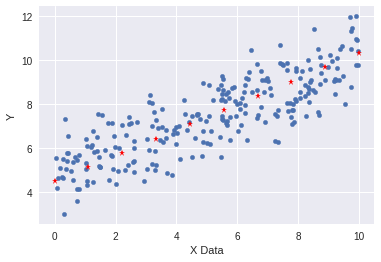

In [0]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')